In [158]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
sales_data = pd.read_csv('supermarket_sales.csv')

# Check for missing values
missing_values = sales_data.isnull().sum()
missing_columns = missing_values[missing_values > 0]

if missing_columns.empty:
    print("No missing values found in the dataset.")
else:
    print("Missing Values in Each Column:\n", missing_columns)

# Data cleaning
# Convert transaction time to hour format
sales_data['Hour'] = pd.to_datetime(sales_data['Time'], format='%H:%M').dt.hour

# Convert date to day format
sales_data['Date'] = pd.to_datetime(sales_data['Date'])
sales_data['Day type'] = sales_data['Date'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Drop columns
sales_data.drop(columns=['gross margin percentage', 'City', 'Invoice ID', 'Date', 'Time', 'Tax 5%', 'Total'], inplace=True)

No missing values found in the dataset.


In [159]:
# Univariate non-graphical data analysis for quantitative attributes
sales_data.describe().round(2)

,Unit price,Quantity,cogs,gross income,Rating,Hour
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,55.67,5.51,307.59,15.38,6.97,14.91
std,26.49,2.92,234.18,11.71,1.72,3.19
min,10.08,1.00,10.17,0.51,4.00,10.00
25%,32.88,3.00,118.50,5.92,5.50,12.00
50%,55.23,5.00,241.76,12.09,7.00,15.00
75%,77.94,8.00,448.90,22.45,8.50,18.00
max,99.96,10.00,993.00,49.65,10.00,20.00


In [160]:
# Univariate non-graphical data analysis for categorical attributes
sales_data.describe(include=[object])

,Branch,Customer type,Gender,Product line,Payment,Day type
count,1000,1000,1000,1000,1000,1000
unique,3,2,2,6,3,2
top,A,Member,Female,Fashion accessories,Ewallet,Weekday
freq,340,501,501,178,345,703


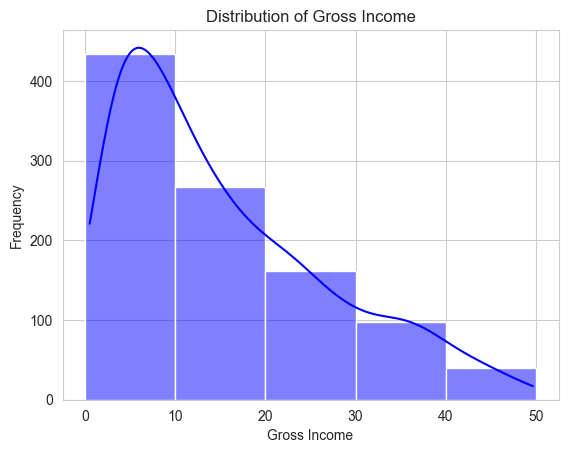

In [161]:
# Univariate data analysis on the distribution of gross income

bins = [0, 10, 20, 30, 40, 50]
sns.histplot(sales_data['gross income'], kde=True, bins=bins, color='blue')
plt.xlabel('Gross Income')
plt.ylabel('Frequency')
plt.title('Distribution of Gross Income')
plt.show()

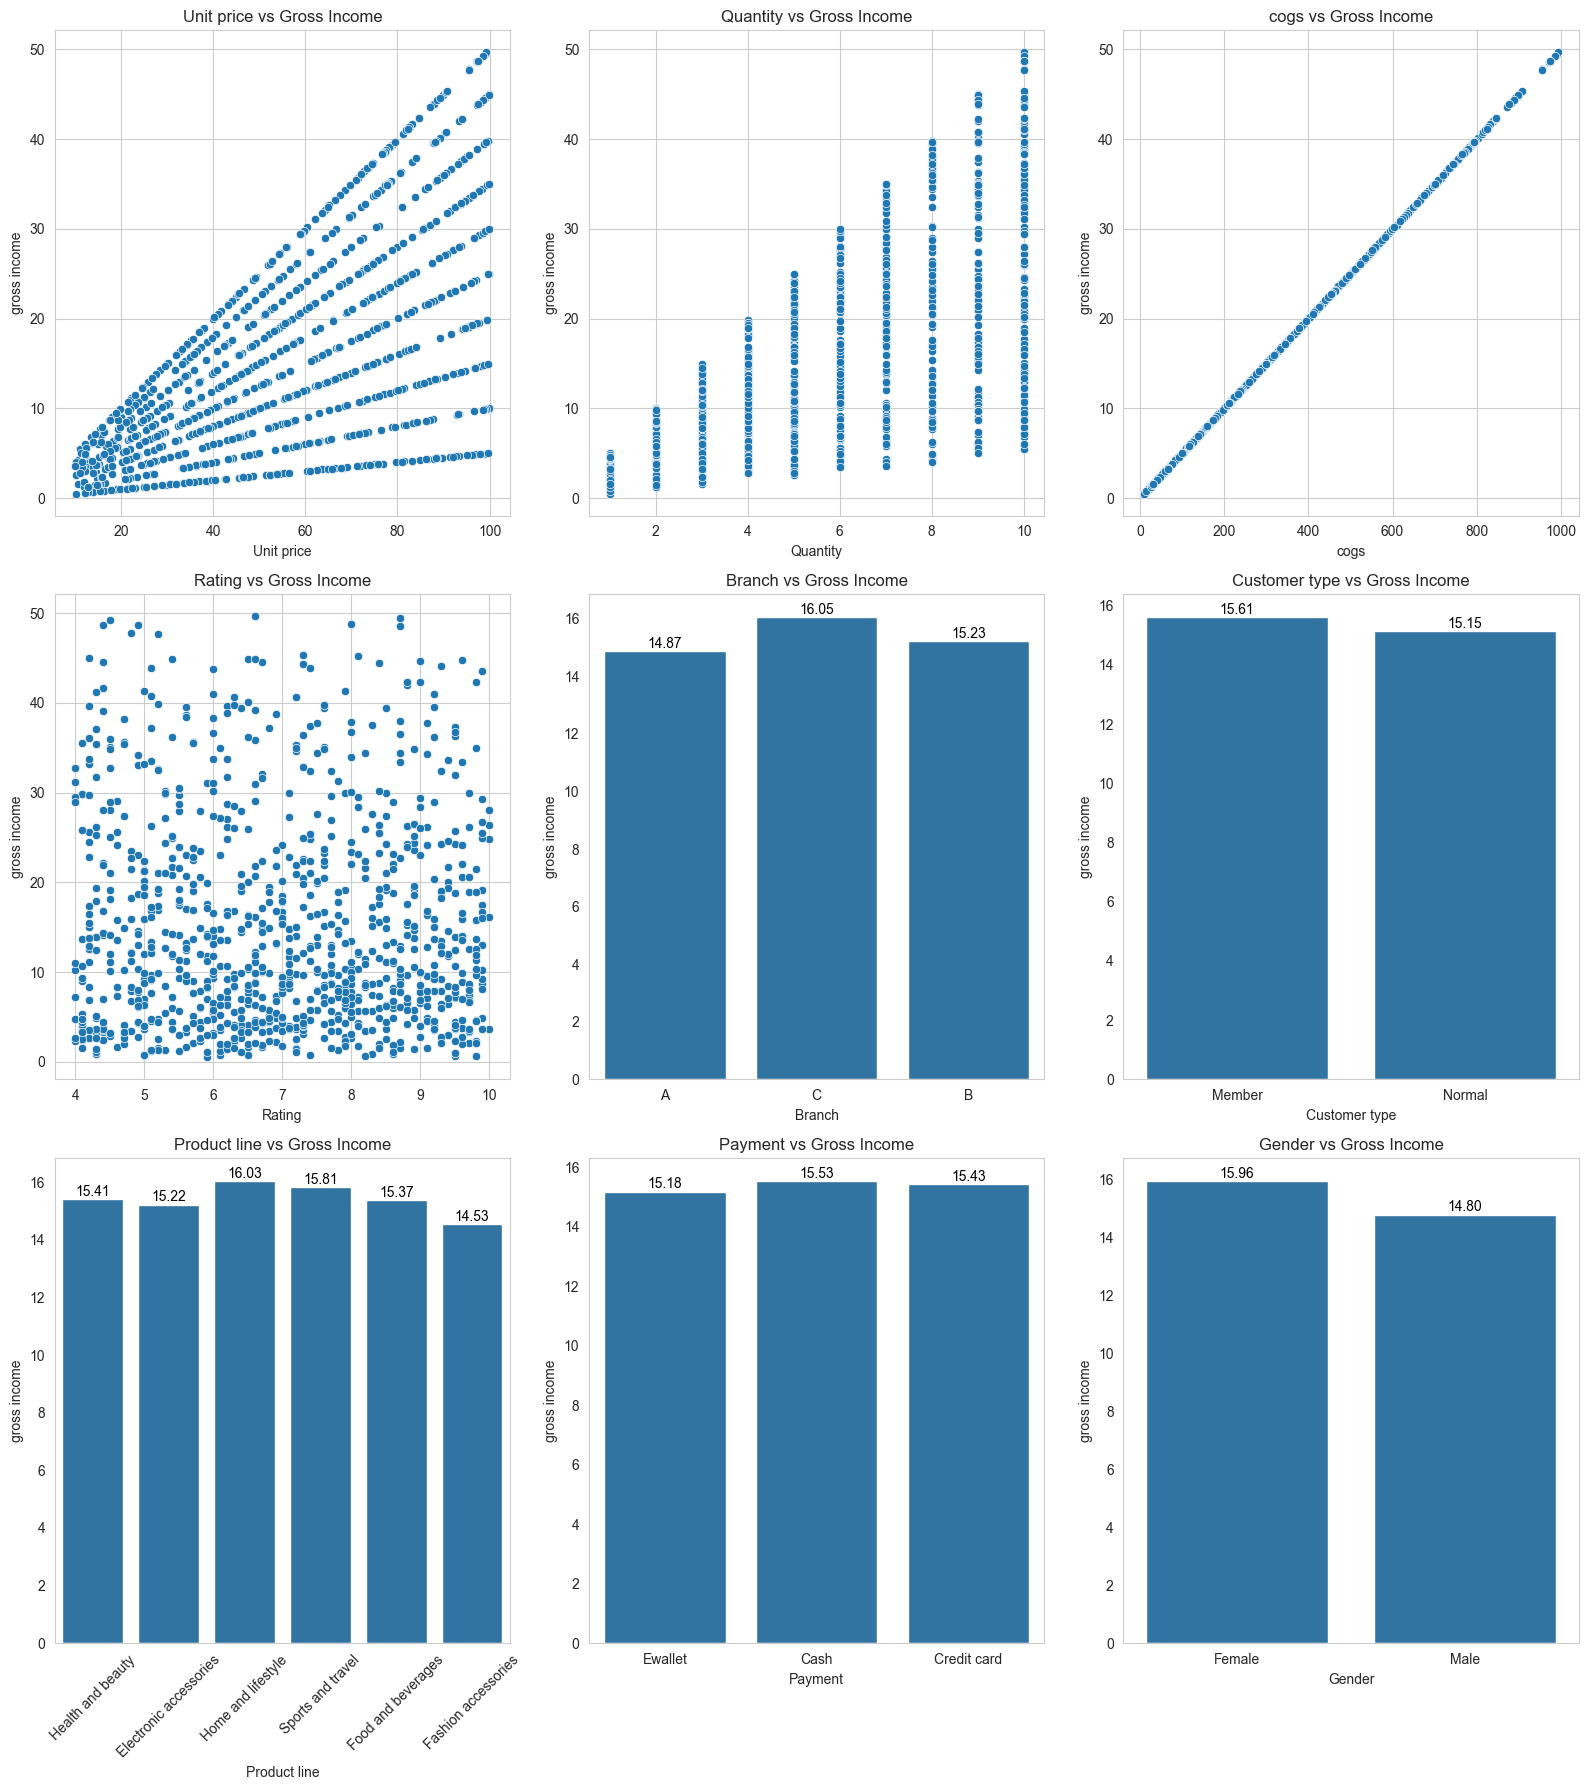

In [171]:
# Bivariate data analysis 
fig, axs = plt.subplots(3, 3, figsize=(16, 18))

sns.set_style("whitegrid")

# Columns for scatter and bar plots
scatter_columns = ['Unit price', 'Quantity', 'cogs', 'Rating']
bar_columns = ['Branch', 'Customer type', 'Product line', 'Payment', 'Gender']

# Generate scatter plots
for i, col in enumerate(scatter_columns):
    row, col_index = divmod(i, 3)
    sns.scatterplot(data=sales_data, x=col, y='gross income', ax=axs[row, col_index])
    axs[row, col_index].set_title(f'{col} vs Gross Income')

# Generate bar plots
for i, col in enumerate(bar_columns):
    row, col_index = divmod(i + len(scatter_columns), 3)  # Continue after scatter plots
    sns.barplot(data=sales_data, x=col, y='gross income', ax=axs[row, col_index], errorbar=None)
    axs[row, col_index].set_title(f'{col} vs Gross Income')
    axs[row, col_index].grid(False)

    for p in axs[row, col_index].patches:
        axs[row, col_index].annotate(f'{p.get_height():.2f}', 
                                     (p.get_x() + p.get_width() / 2., p.get_height() + 0.01),  
                                     ha='center', va='bottom', fontsize=10, color='black')

axs[2, 0].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

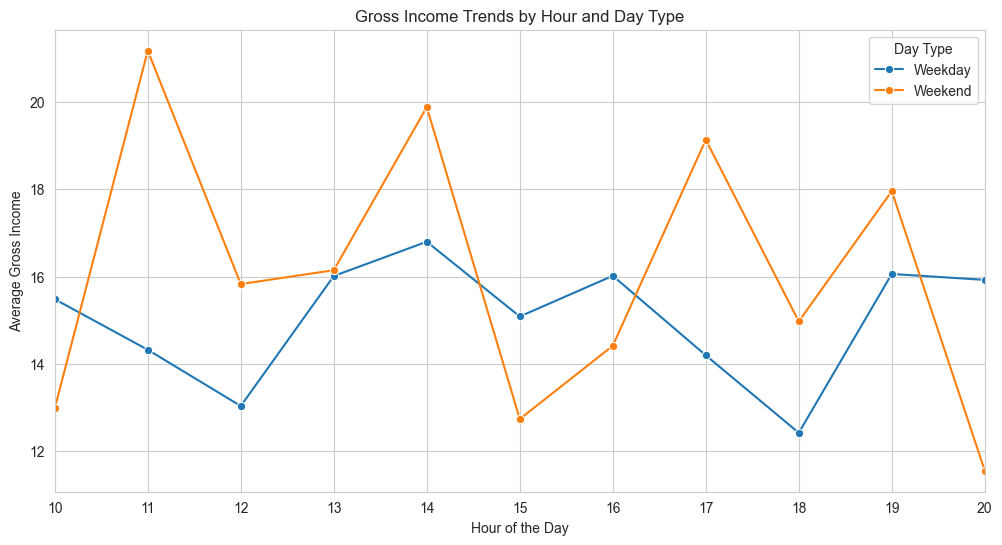

In [163]:
# Multivariate data analysis - for day type, hours, and gross income

income_by_hour = sales_data.groupby(['Day type', 'Hour'])['gross income'].mean().reset_index()
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
min_hour = income_by_hour['Hour'].min()
max_hour = income_by_hour['Hour'].max()
sns.lineplot(data=income_by_hour, x='Hour', y='gross income', hue='Day type', marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Gross Income')
plt.title('Gross Income Trends by Hour and Day Type')
plt.xticks(range(min_hour, max_hour + 1))  
plt.xlim(min_hour, max_hour)
plt.legend(title="Day Type")
plt.show()

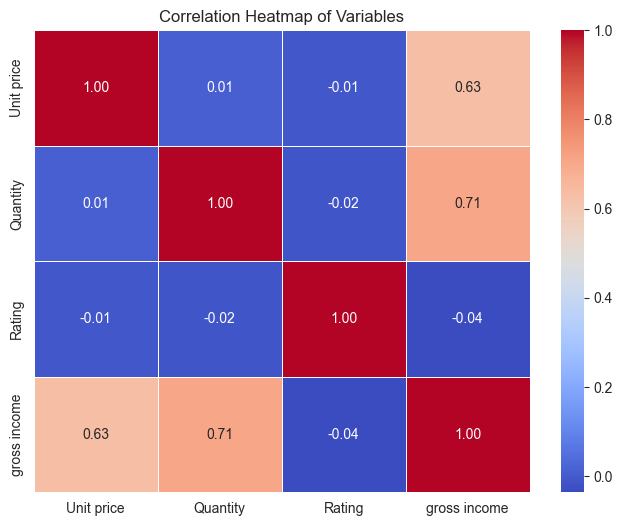

In [166]:
# Calculate the correlation matrix for numerical attribues
correlation_matrix = sales_data[['Unit price', 'Quantity', 'Rating', 'gross income']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Variables')
plt.show()

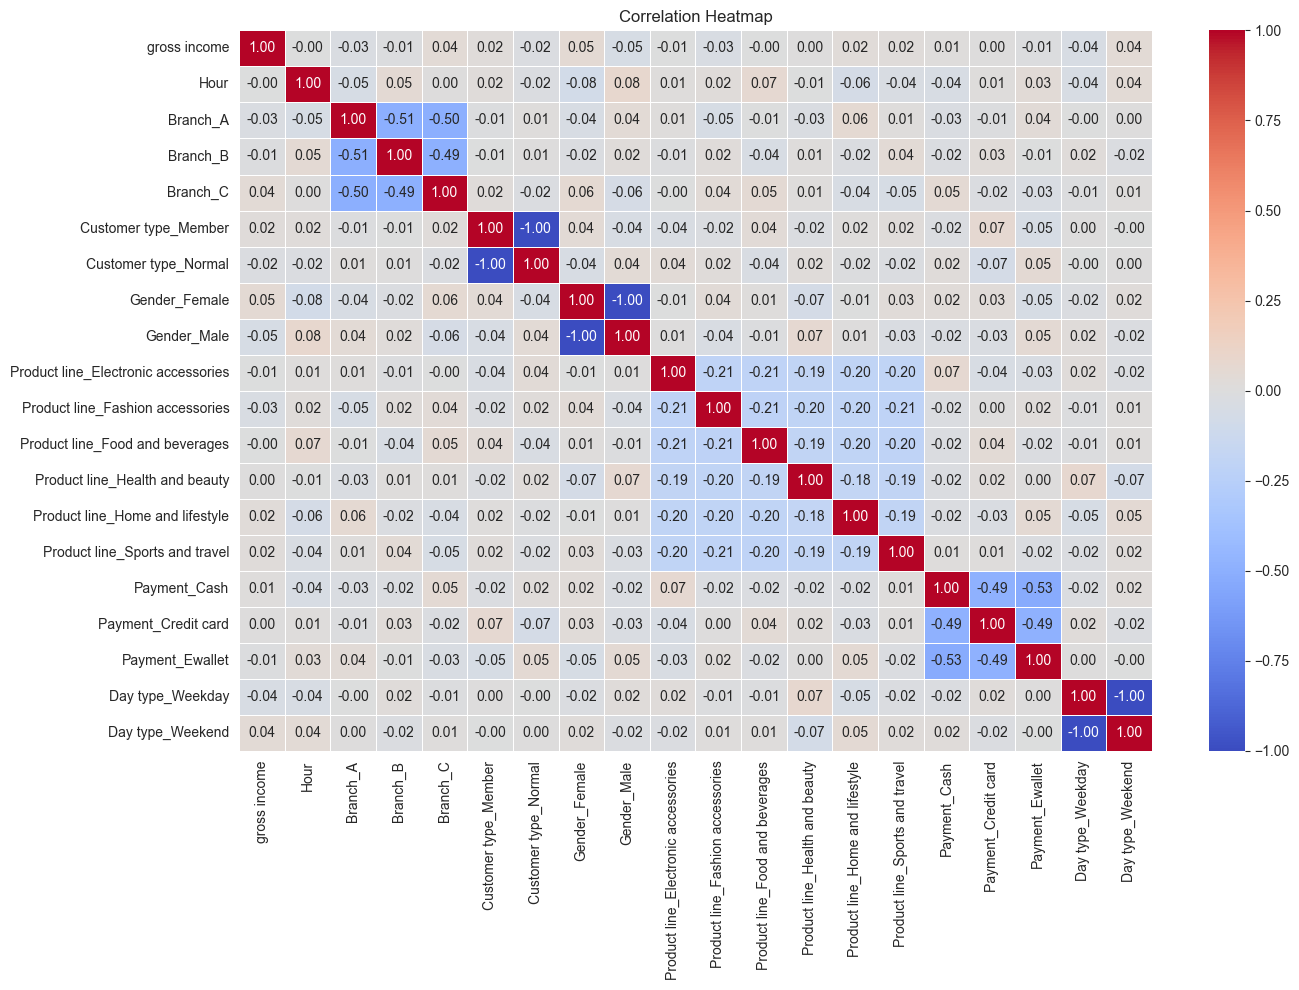

In [177]:
# Calculate the correlation matrix for categorical attribues
categorical_columns = sales_data.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(sales_data[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))
sales_data_encoded = pd.concat([sales_data, one_hot_df], axis=1)
sales_data_encoded = sales_data_encoded.drop(categorical_columns, axis=1)

sales_data_encoded = sales_data_encoded.drop(columns=['cogs', 'Unit price', 'Quantity', 'Rating'])

numeric_data = sales_data_encoded.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()